In [134]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
df = pd.read_csv("./Dataset/Diabetes Missing Data.csv")

In [26]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [28]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [11]:
df.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
df.isna().sum() / len(df) * 100

Pregnant              0.000000
Glucose               0.651042
Diastolic_BP          4.557292
Skin_Fold            29.557292
Serum_Insulin        48.697917
BMI                   1.432292
Diabetes_Pedigree     0.000000
Age                   0.000000
Class                 0.000000
dtype: float64

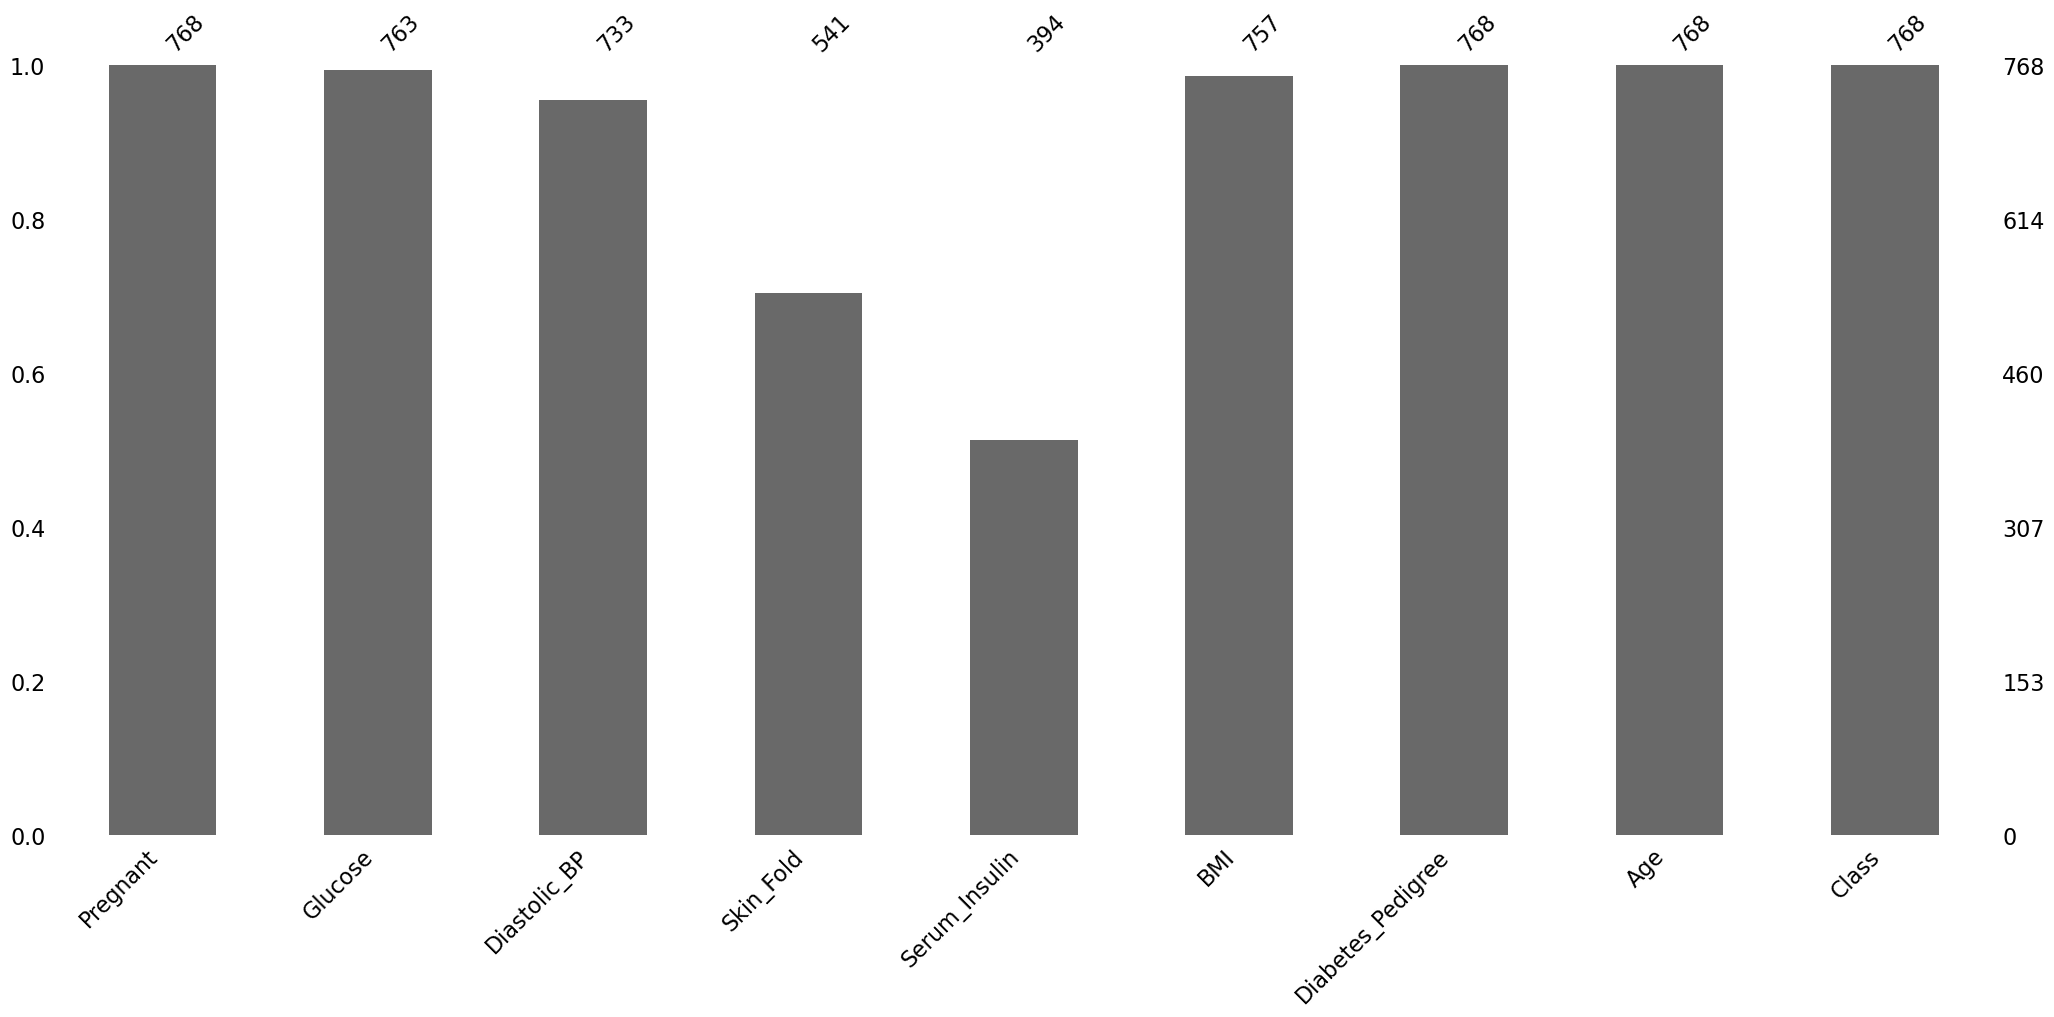

In [60]:
msno.bar(df)
plt.show()

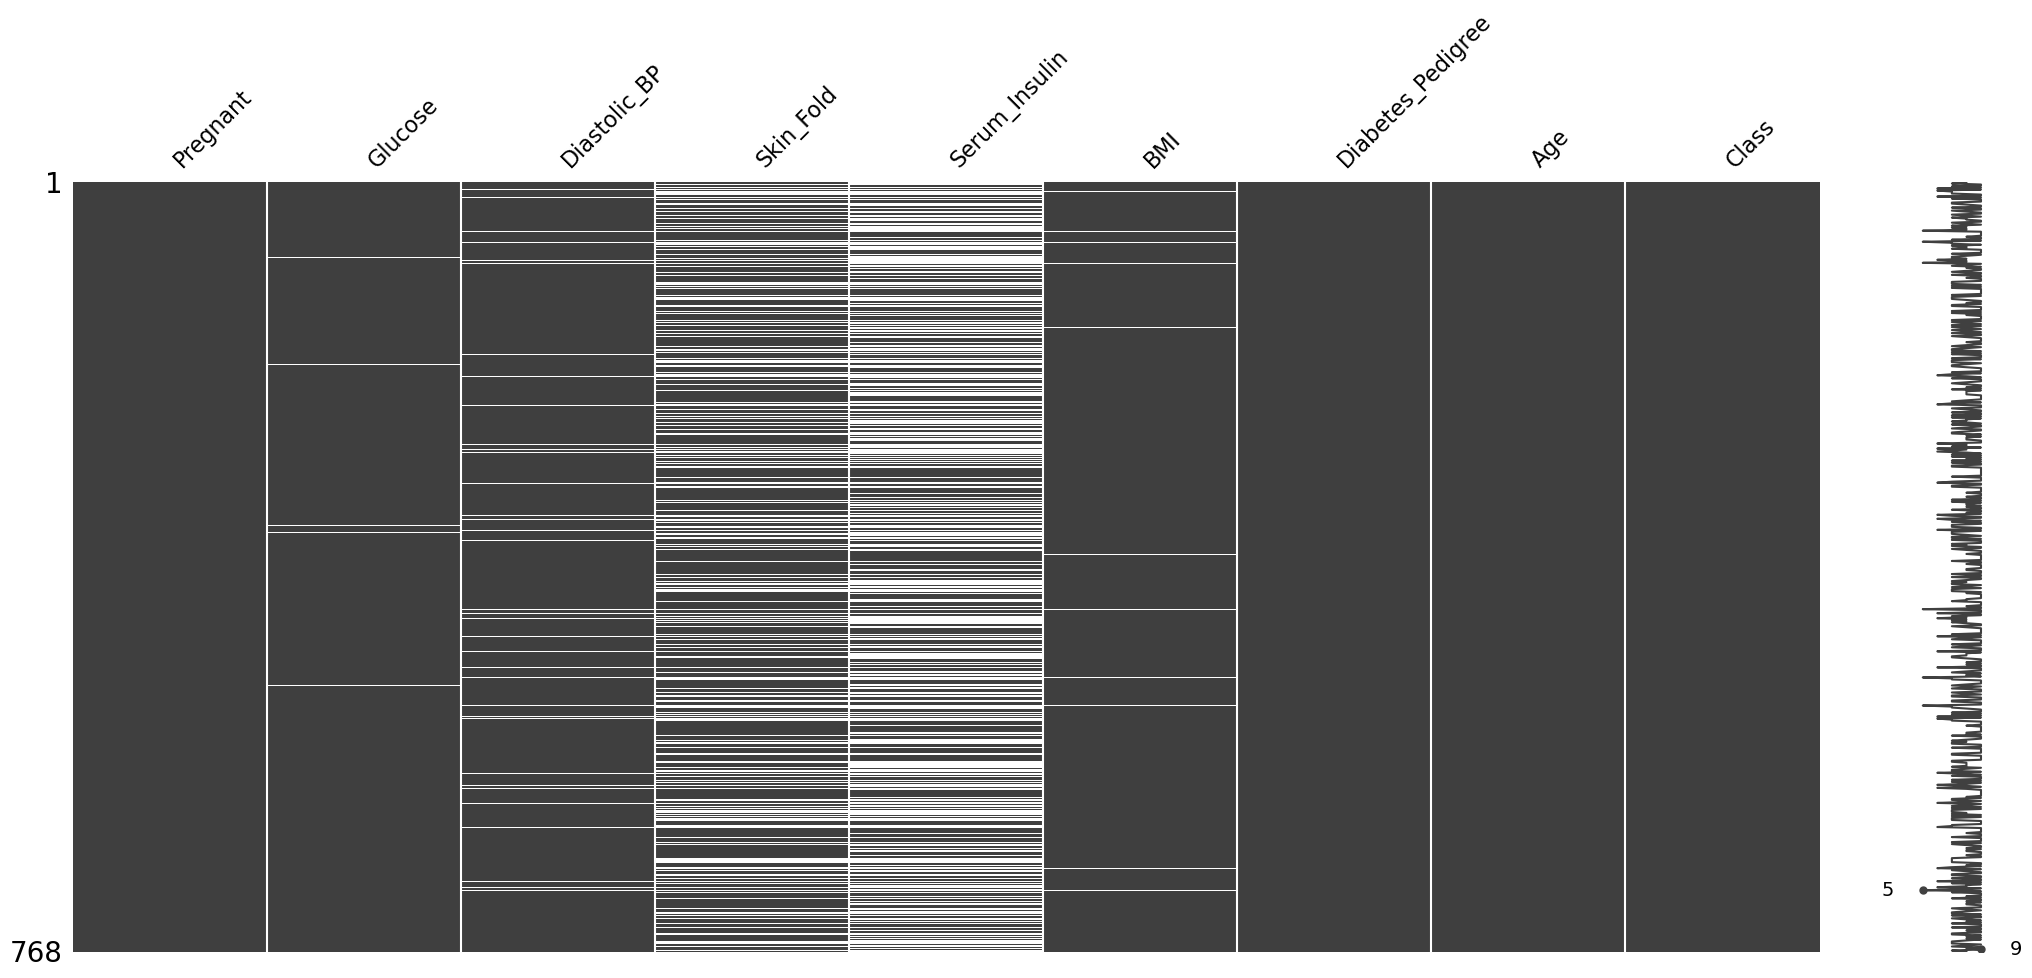

In [68]:
msno.matrix(df) 
plt.show()

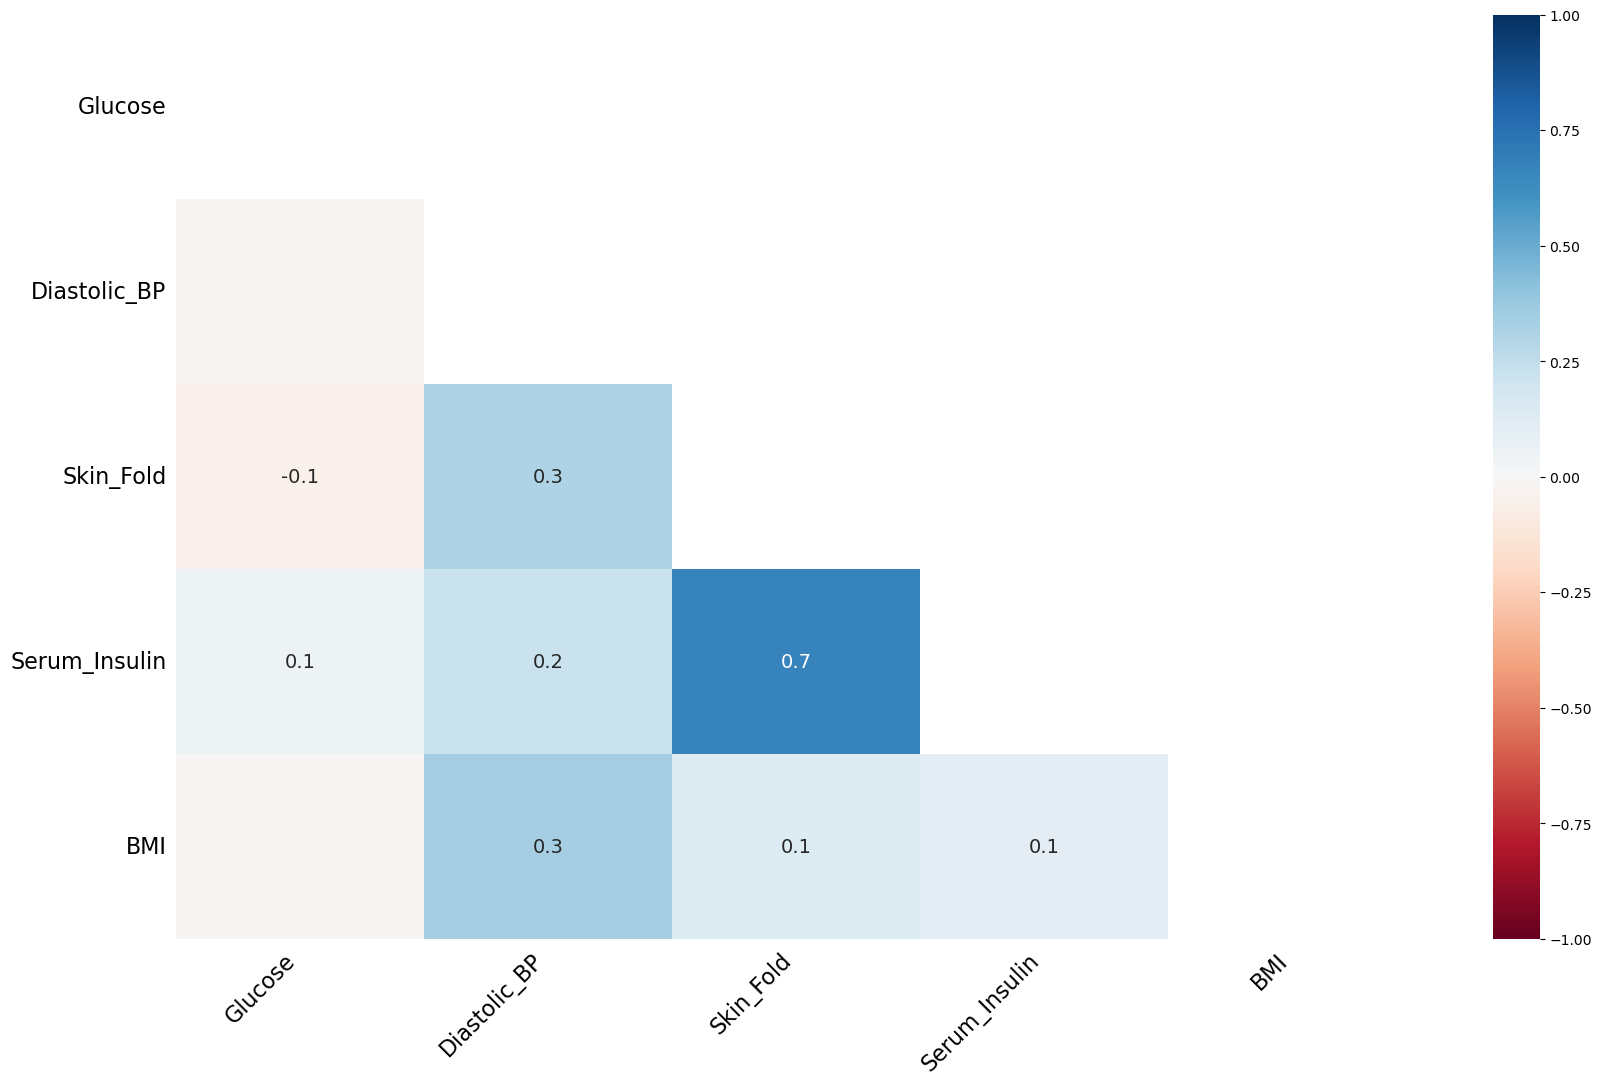

In [72]:
msno.heatmap(df)
plt.show()

serum_insulin and skin_fold are related

<Axes: >

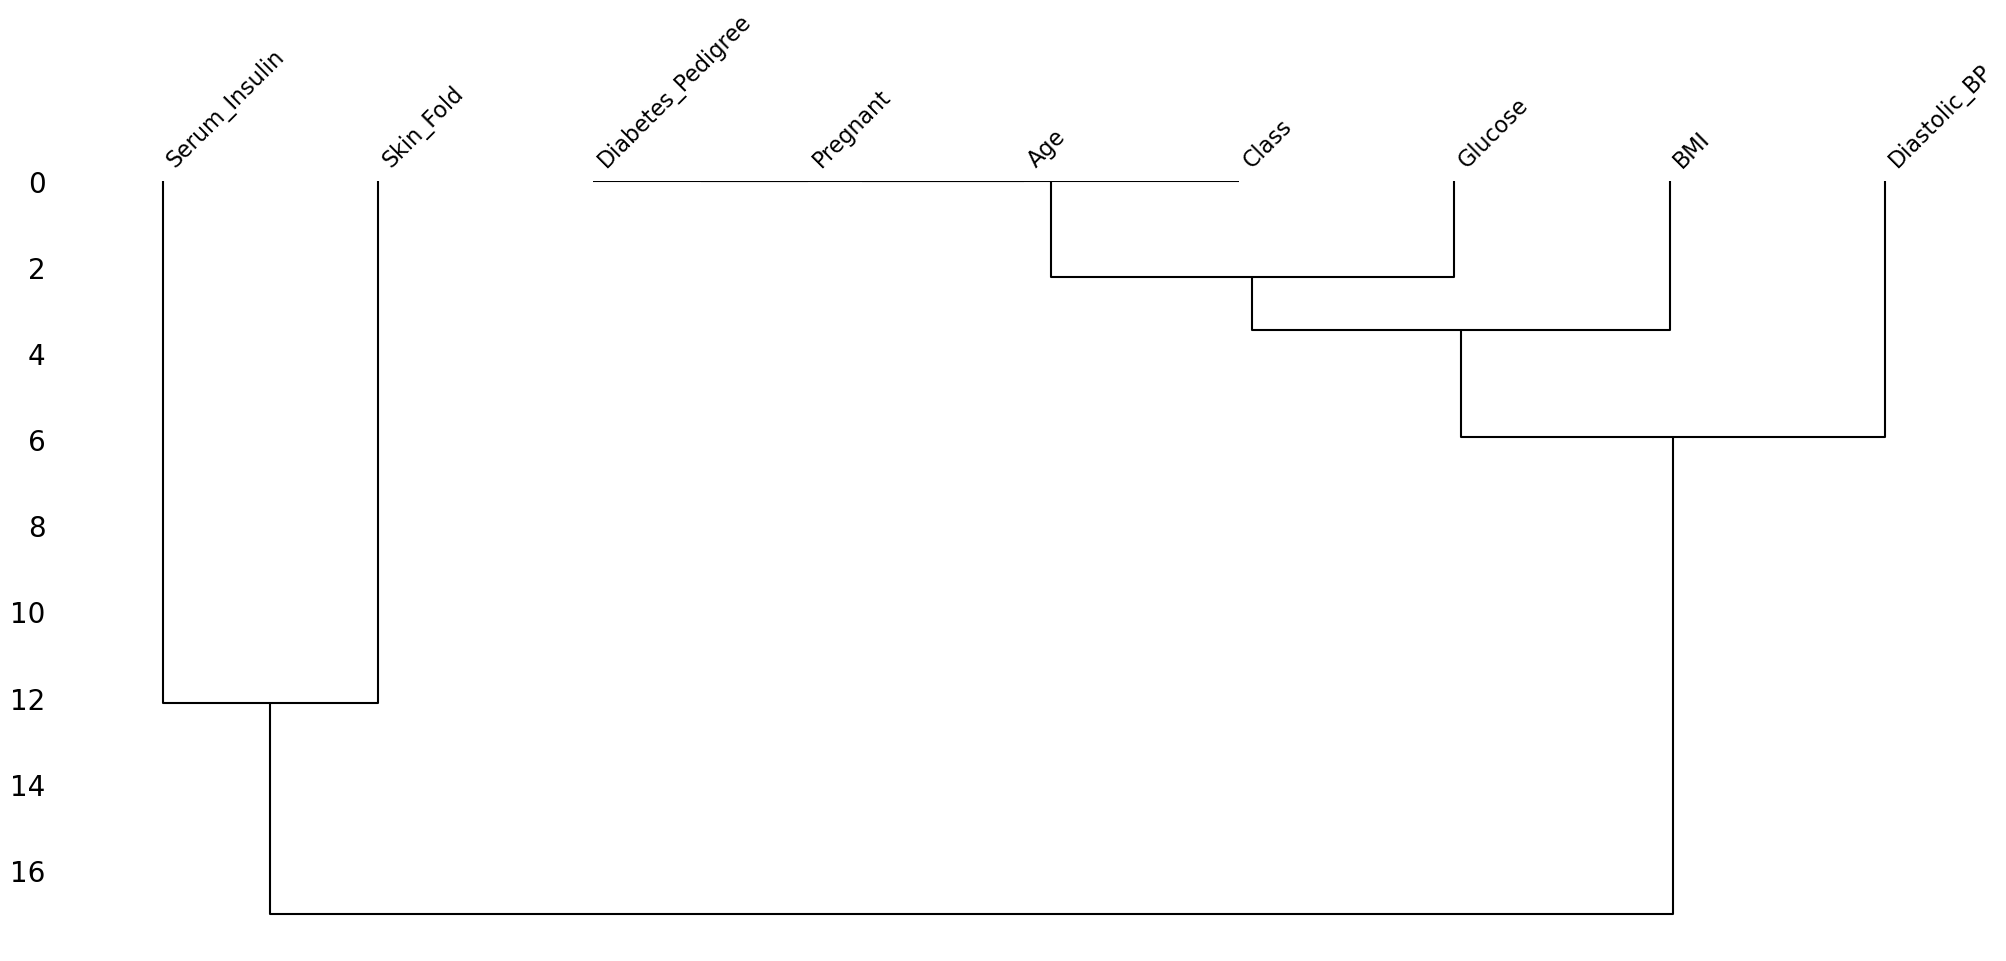

In [76]:
msno.dendrogram(df)

In [84]:
df["Class"].value_counts() / len(df) * 100

Class
0    65.104167
1    34.895833
Name: count, dtype: float64

In [88]:
X = df.drop(columns = "Class")
y = df["Class"]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)

In [102]:
len(y_train)

576

In [104]:
y_train.value_counts() / len(y_train) * 100

Class
0    65.104167
1    34.895833
Name: count, dtype: float64

In [106]:
len(y_test)

192

In [110]:
y_test.value_counts() / len(y_test) * 100

Class
0    65.104167
1    34.895833
Name: count, dtype: float64

In [124]:
dummy = DummyClassifier(strategy = 'stratified')

In [128]:
dummy.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [130]:
y_pred = dummy.predict(X_test)

In [132]:
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.67      0.68      0.68       125
           1       0.39      0.39      0.39        67

    accuracy                           0.58       192
   macro avg       0.53      0.53      0.53       192
weighted avg       0.58      0.58      0.58       192



In [136]:
logreg = LogisticRegression(max_iter=1000)

In [138]:
logreg.fit(X_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values